In [1]:
# import dependencies
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [2]:
# import data processing functions
from datafuncs import *

# Analysis of behavior in individual mice

## Plot individual and mean eyeblink responses from one mouse on one day

In [3]:
# Get files
date = '2025-05-17'  # Set date
mouse_id = "8689S"  # Set mouse ID
fec_folder_path = f"../../Data/fec/{mouse_id}/training/"  # Path to FEC data
stim_folder_path = f"../../Data/stim/{mouse_id}/training/"  # Path to stimulus data

# Get list of FEC and stimulus files
fec_files = sorted(glob.glob(fec_folder_path + "*.csv"))
stim_files = sorted(glob.glob(stim_folder_path + "*.csv"))

Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.


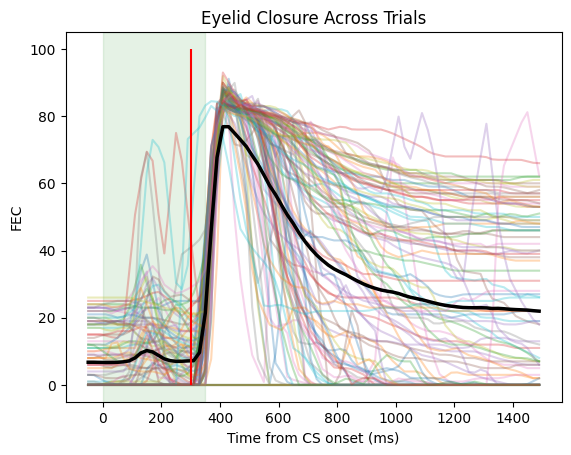

In [4]:
# Interpolate x values to plot mean FEC across trials in one experiment

# Group files by date
files_by_date = group_by_date(fec_files, stim_files)

# Extract data from selected date
dfs = process_date_files(files_by_date, date)
if dfs is None:
    print(f"No data from {date}")
else:
    df_fec, df_stim = dfs  # Save FEC and stim data as dataframes

    num_trials = len(df_stim)  # save number of trials
    df_fec["FEC"] = normalize_fec(df_fec["FEC"])  # Normalize FEC values
    merged_df = merge_dataframes(df_fec, df_stim)  # Merge the dataframes based on the 'Trial #' column
    
    # Define common x-axis (smooth and finely spaced)
    x_common = np.arange(-50, 1500, 20)

    # Calculate mean across trials
    y_mean, y_interps = interpolated_curve(files_by_date, date, x_common)

    # # Plot faded individual interpolated curves
    indiv_trials = plt.plot(x_common, y_interps.T, alpha=0.3)
    # Give each curve a label
    for i, curve in enumerate(indiv_trials):
        curve.set_label(f"Trial {i+1}")
    
    # Plot dark average line
    plt.plot(x_common, y_mean, color='k', linewidth=2.5, label='Mean')

    # Green shading shows CS duration
    plt.axvspan(0, 350, color='g', alpha=0.1, label="CS duration")
    # Red line shows US onset (ends at same time as CS)
    plt.vlines(x=300, ymin=0, ymax=100, color="r")

    # Add labels, legend, etc.
    plt.xlabel("Time from CS onset (ms)")
    plt.ylabel("FEC")
    plt.title("Eyelid Closure Across Trials")
    # plt.legend()
    # plt.tight_layout()
    plt.show()

## Mean traces for one mouse across multiple days

In [5]:
# Get files
mouse_id = "8689S"  # Set mouse ID
fec_folder_path = f"../../Data/fec/{mouse_id}/training/"  # Path to FEC data
stim_folder_path = f"../../Data/stim/{mouse_id}/training/"  # Path to stimulus data
# Get list of FEC and stimulus files
fec_files = sorted(glob.glob(fec_folder_path + "*.csv"))
stim_files = sorted(glob.glob(stim_folder_path + "*.csv"))

In [ ]:
# Define common x-axis (smooth and finely spaced)
x_common = np.arange(-50, 1500, 20)

# Group files by date
files_by_date = group_by_date(fec_files, stim_files)
dates = [date for date in files_by_date]

# TODO: This is temporary so code will run during testing
dates = [date for date in dates if "2025-05-16" not in date and "2025-05-19" not in date]
dates.sort()

# sort dates and assign day numbers
day_nums = {date:i for i, date in enumerate(dates)}

# Save list of curves
curves = np.zeros((len(dates), len(x_common)))  # One curve for each date

# Populate curves with means from each day
for i, date in enumerate(dates):
    # Caluclate mean curve
    interp = interpolated_curve(files_by_date, date, x_common)
    if interp is not None:
        y_mean, _ = interp
        curves[i, :] = y_mean

Processing 2025-05-07 with 1 FEC files and 1 stimulus files.
Processing 2025-05-08 with 1 FEC files and 1 stimulus files.
Processing 2025-05-09 with 1 FEC files and 1 stimulus files.
Processing 2025-05-11 with 2 FEC files and 1 stimulus files.
Processing 2025-05-12 with 1 FEC files and 0 stimulus files.
Processing 2025-05-13 with 1 FEC files and 1 stimulus files.
Processing 2025-05-14 with 1 FEC files and 1 stimulus files.
Processing 2025-05-15 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-18 with 1 FEC files and 1 stimulus files.


### Plot of means across multiple training days

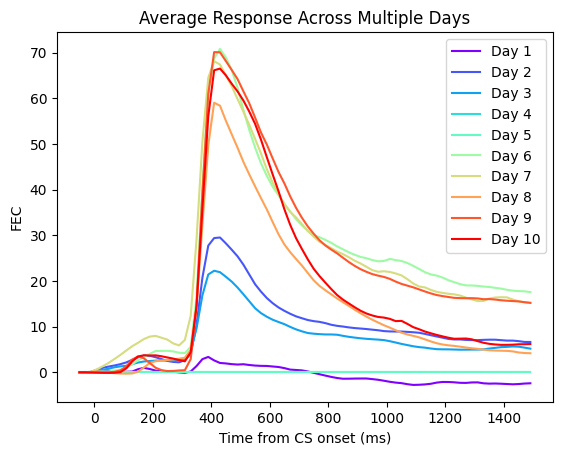

In [7]:
## Create plot
# plt.figure(figsize=(8,6))

# Get reversed rainbow colormap with 14 evenly spaced colors
cmap = plt.cm.rainbow_r
colors = [cmap(i / (len(curves) - 1)) for i in range(len(curves)-1, -1, -1)]

# Plot curves
temp = curves[:, :]
for i, y_mean in enumerate(curves):
    temp[i, :] -= y_mean[0]
lines = plt.plot(x_common, temp.T, color=None)

# Manually assign colors to curves
for line, c in zip(lines, colors):
    line.set_color(c)
    
for i, line in enumerate(lines):
    line.set_label(f"Day {i+1}")

# # Green shading shows CS duration
# plt.axvspan(0, 350, color='g', alpha=0.1, label="CS duration")
# # Red line shows US onset (ends at same time as CS)
# plt.vlines(x=300, ymin=0, ymax=100, color="r")

# Add labels, legend, etc.
plt.xlabel("Time from CS onset (ms)")
plt.ylabel("FEC")
plt.title("Average Response Across Multiple Days")
plt.legend()
plt.show()

### Joyplot of means across days

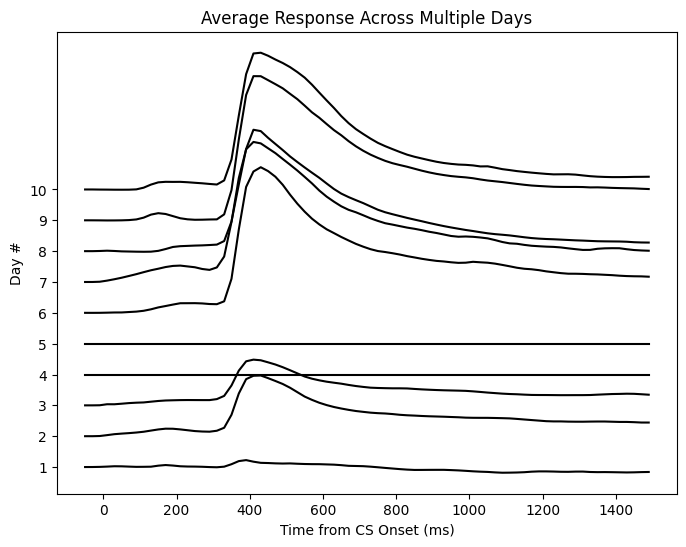

In [8]:
## Create joyplot
plt.figure(figsize=(8,6))

# vertical spacing between curves
offset = 15.0

# Plot curves
temp = curves[:, :]
for i, y_mean in enumerate(curves):
    temp[i] += i * offset - y_mean[0]
lines = plt.plot(x_common, temp.T, color='k')
    
# Set yticks at the offsets
yticks = [i*offset for i in range(len(curves))]
yticklabels = [str(i+1) for i in range(len(curves))]
plt.yticks(yticks, yticklabels)   # apply custom tick positions & labels

plt.title("Average Response Across Multiple Days")
plt.xlabel("Time from CS Onset (ms)")
plt.ylabel("Day #")
plt.show()

## Joyplot of Trials Across Days

In [9]:
# Get files
mouse_id = "8689S"  # Set mouse ID
fec_folder_path = f"../../Data/fec/{mouse_id}/training/"  # Path to FEC data
stim_folder_path = f"../../Data/stim/{mouse_id}/training/"  # Path to stimulus data
# Get list of FEC and stimulus files
fec_files = sorted(glob.glob(fec_folder_path + "*.csv"))
stim_files = sorted(glob.glob(stim_folder_path + "*.csv"))

In [10]:
# Group files by date
files_by_date = group_by_date(fec_files, stim_files)
# dates = [date for date in files_by_date]
dates = ["2025-05-13", "2025-05-14", "2025-05-15", "2025-05-17", "2025-05-18", ]

# TODO: This is temporary so code will run during testing
dates = [date for date in dates if "2025-05-16" not in date and "2025-05-19" not in date]

# Get num_trials
for i, date in enumerate(dates):
    dfs = process_date_files(files_by_date, dates[0])
    if dfs is None:
        print(f"No data from {date}")
        continue
    else:
        _, df_stim = dfs  # Save FEC and stim data as dataframes
        break

num_trials = len(df_stim)  # save number of trials

Processing 2025-05-13 with 1 FEC files and 1 stimulus files.


In [11]:
# Define common x-axis (smooth and finely spaced)
x_common = np.arange(-50, 1500, 20)

# Save list of curves
curves = np.zeros((len(dates), num_trials, len(x_common)))

# Populate curves with trials from each day
for i, date in enumerate(dates):
    # Caluclate mean curve
    interp = interpolated_curve(files_by_date, date, x_common)
    if interp is not None:
        _, y_trials = interp
        curves[i, :, :] = y_trials

Processing 2025-05-13 with 1 FEC files and 1 stimulus files.
Processing 2025-05-14 with 1 FEC files and 1 stimulus files.
Processing 2025-05-15 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-18 with 1 FEC files and 1 stimulus files.


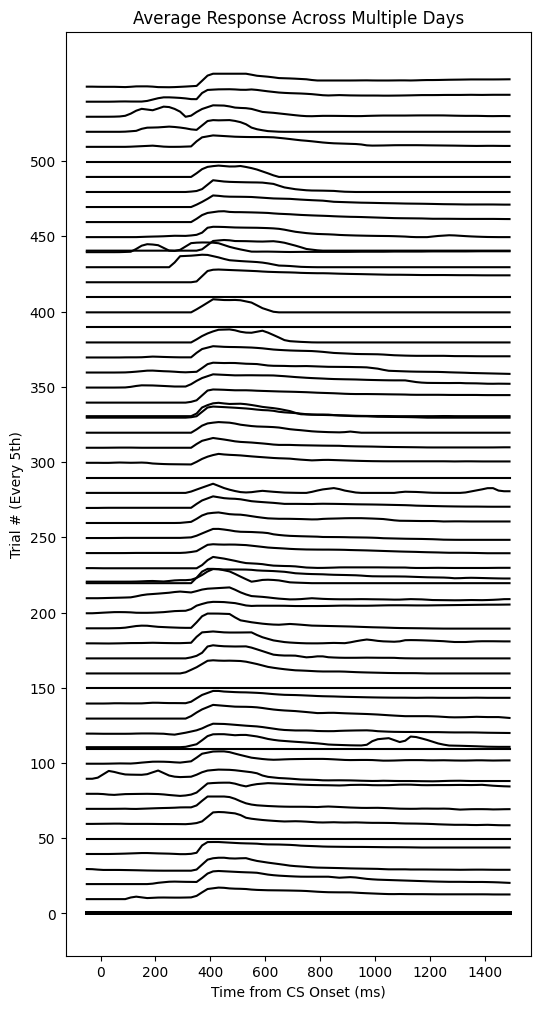

In [12]:
## Create joyplot
plt.figure(figsize=(6, int(2.5*len(dates))))

# vertical spacing between curves
offset = 10.0

# Plot curves
temp = np.zeros((len(dates) * num_trials, len(x_common)))
for i, date in enumerate(curves):
    for j, y_trial in enumerate(date):
        if j == 0 or (j+1) % 10 == 0:
            line_num = i*num_trials + j
            temp[line_num] = curves[i, j, :] - curves[i, j, 0] + (line_num * offset) + (5 * np.ones_like(temp[line_num]))
lines = plt.plot(x_common, temp.T, color='k')
    
# Set yticks at the offsets
# yticks = [i*offset for i in range(len(dates) * num_trials)]
# yticklabels = [str(i+1) for i in range(len(dates) * num_trials)]

# Set yticks every 50 trials
step = 50
yticks = [i * offset for i in range(len(dates) * num_trials) if i % step == 0]
ylabels = [int(i / offset) for i in yticks]
plt.yticks(yticks,ylabels)   # apply custom tick positions & labels

plt.title("Average Response Across Multiple Days")
plt.xlabel("Time from CS Onset (ms)")
plt.ylabel("Trial # (Every 5th)")
plt.show()